# Sam Kole

## Research question/interests

I would like to investigate Mars' capacity to support life by examining the range of observed temperatures and pressures. What weather characteristics make it uninhabitable? For example, as far as we know, for there to be life on a planet, there must be liquid water (at least some of the time). This would only be the case for certain pressure/temperature ranges.

Depending on how much time I have, I may also look for additional datasets to supplement the one we have chosen. Extreme weather on Mars woud be another interesting topic to explore, but unfortunately the wind speed data was unavailable. I am also interested in Mars' average temperatures by season and year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("../data/raw/mars-weather.csv")
data_raw

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


# Milestone 3
## Task 1: EDA

*See the Milestone 5 section for cleaned up plots*

First, I'll look at the shape and general trends in the data:

In [3]:
data_raw.shape

(1894, 10)

In [4]:
data_raw.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [5]:
data_raw.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


In [6]:
data_raw.nunique()

id                  1894
terrestrial_date    1894
sol                 1894
ls                   360
month                 12
min_temp              29
max_temp              46
pressure             199
wind_speed             0
atmo_opacity           2
dtype: int64

Examining the atmo_opacity column further,

In [7]:
data_raw.atmo_opacity.unique()

array(['Sunny', '--'], dtype=object)

Clearly neither this column nor the wind_speed column don't offer any useful information. The id column isn't useful to me either, since every row already has its own unique index. I'll remove these in Task 2.
I'm interested in whether Mars can potentially support life based on this data, so I'm primarily interested in the temperature. I'll do a few plots to get a visual idea of the trends:

Text(0.5, 1.0, 'Correlation strength between Mars weather parameters')

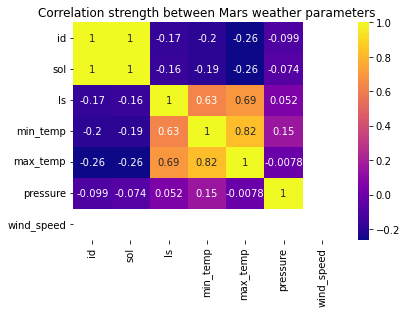

In [8]:
dr = data_raw.copy()
data_raw_mx = data_raw.corr()
sns.heatmap(data_raw_mx, annot=True, cmap='plasma')
plt.title("Correlation strength between Mars weather parameters")

Month/ls correlate strongly with the temps, but they're just time/seasonal indicators, so that is to be expected. Another interesting relationship to examine may be temp and pressure since there is some correlation there.

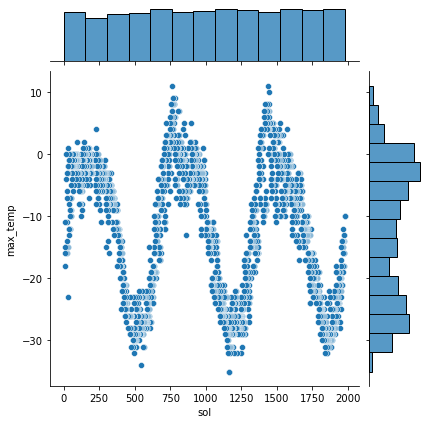

In [9]:
sns.jointplot(x='sol',y='max_temp', data=data_raw)

The max temp is given in degrees C, and sol is the number of Matrian days (sols) elapsed since the Curiosity rover landed.
From this plot, I can see clear seasonal trends in the maximum temperature, and many of the values are well above 0 degrees Celsius, which is a plus if we're looking for habitability. The evenness of the bars on top indicate that the readings were taken regularly.

Text(0.5, 0, 'Magnitude of daily temp. fluctuation ($\\degree$C)')

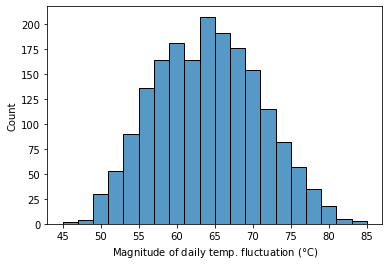

In [10]:
sns.histplot((data_raw['max_temp'] - data_raw['min_temp']), bins=20)
plt.xlabel("Magnitude of daily temp. fluctuation ($\degree$C)")

Histogram of daily temp. fluctuation on Mars. From this plot, fluctuation values appear Gaussian with a peak at about 62°C. The minimum amount of fluctuation is about 45°C and the maximum is about 85°C.

Next, I'll look at the relationship between pressure and temperature. First, seasonal pressure:

<AxesSubplot:xlabel='month', ylabel='pressure'>

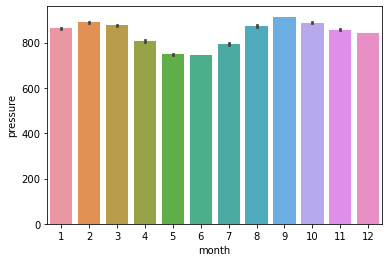

In [11]:
mNames = [(f"Month {x}") for x in range(1,13)]
data_raw['month'].replace(mNames, list(range(1,13)), inplace=True)
sns.barplot(x='month', y='pressure', data=data_raw)

Fairly steady, but with clear seasonal trends. Now if we look at pressure and temp together...

<AxesSubplot:xlabel='pressure', ylabel='max_temp'>

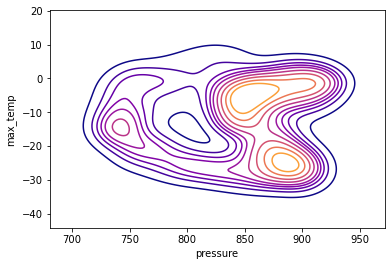

In [12]:
sns.kdeplot(x=data_raw['pressure'], y=data_raw['max_temp'], cmap='plasma')

From this plot, it seems that the pressure is relatively equal in the summer and winter (at the highest and lowest values of max_temp), but it drops for intermediate values, perhaps during seasonal transitions/spring/fall.

I now feel like I have a good idea of the trends in the data that's relevant to me.

## Task 2: Data Analysis Pipeline

1. Load Data (already done)
1. Clean Data
- As I mentioned above, the 'id', 'atmo_opacity', and 'wind_speed' columns don't offer anything useful. So, I'll remove those columns as well as any rows containing nan values. I'll also remove the terrestrial_date column since it's not really relevant to my research interests.

In [13]:
data_raw = pd.read_csv("../data/raw/mars-weather.csv")
data_clean = data_raw.copy().drop(['atmo_opacity','wind_speed', 'id', 'terrestrial_date'], axis=1).dropna(axis=0)
data_clean.reset_index()
print(data_clean.shape)
data_clean.head()

(1867, 6)


,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,Month 5,-77.0,-10.0,727.0
1,1976,135,Month 5,-77.0,-10.0,728.0
2,1975,134,Month 5,-76.0,-16.0,729.0
3,1974,134,Month 5,-77.0,-13.0,729.0
4,1973,133,Month 5,-78.0,-18.0,730.0


Now I'll rename the 'ls' column so that it makes more intuitive sense to me, and change the months to just numerical values.

In [14]:
data_clean.rename(columns={'ls':'solar_longitude'})
mNames = [(f"Month {x}") for x in range(1,13)]
data_clean['month'].replace(mNames, list(range(1,13)), inplace=True)
data_clean

,sol,ls,month,min_temp,max_temp,pressure
0,1977,135,5,-77.0,-10.0,727.0
1,1976,135,5,-77.0,-10.0,728.0
2,1975,134,5,-76.0,-16.0,729.0
3,1974,134,5,-77.0,-13.0,729.0
4,1973,133,5,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1887,14,157,6,-74.0,-16.0,740.0
1888,13,157,6,-74.0,-15.0,732.0
1889,12,156,6,-76.0,-18.0,741.0
1890,11,156,6,-76.0,-11.0,740.0


## Task 3: Method Chaining
Here, I will transfer the steps I performed to clean and process the data in Task 2 into a .py file.

In [15]:
import project_functions1 as p1

In [16]:
clean_data = p1.load_and_process("../data/raw/mars-weather.csv")
clean_data

,sol,solar_longitude,month,min_temp,max_temp,pressure
0,1977,135,5,-77.0,-10.0,727.0
1,1976,135,5,-77.0,-10.0,728.0
2,1975,134,5,-76.0,-16.0,729.0
3,1974,134,5,-77.0,-13.0,729.0
4,1973,133,5,-78.0,-18.0,730.0
...,...,...,...,...,...,...
1887,14,157,6,-74.0,-16.0,740.0
1888,13,157,6,-74.0,-15.0,732.0
1889,12,156,6,-76.0,-18.0,741.0
1890,11,156,6,-76.0,-11.0,740.0


Nice and clean! This is exactly what I was trying to produce.

## Task 4: Data Analysis
See group notebook and the Milestone 5 section (below).

# Milestone 4
## Task 1
I'll begin by saving my wrangled data as a csv file.

In [17]:
clean_data.to_csv("../data/processed/mars_processed1.csv")

Now the data is ready to be used in Tableau.

## Milestone 5
The first thing I'll do is clean up some of the plots I made for Milestone 3.

Text(22.0, 0.5, 'Max. Temp. ($\\degree$C)')

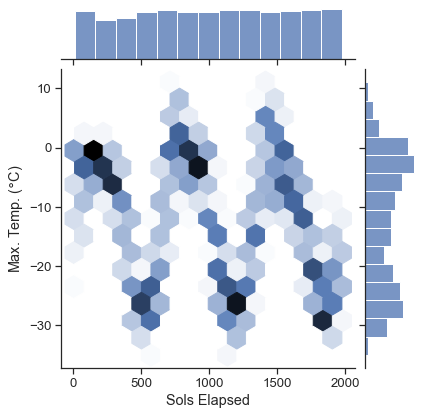

In [18]:
sns.set_theme(style="ticks", font_scale=1.2)

sns.jointplot(x='sol',y='max_temp', data=data_clean, kind='hex')
plt.xlabel("Sols Elapsed")
plt.ylabel("Max. Temp. ($\degree$C)")

## Fig. 1
Hexbin plot showing the relationship between sols elapsed and max. temp.. This plot does a better job of displaying the max. temp. data than a scatter plot because you can see the density. We can also see the sinusoidal behavior that occurs over the years, which is indicative of changing seasons.

For my research question, I am particularly interested in the peaks of this graph. It looks like Mars commonly experiences summer highs of around 0°C and winter highs of around -30°C. This means that, if there were water on Mars (or if we were to put some there), it could exist in liquid form during the hottest part of the day in the summer months, but not any other time of the year (or day).

---

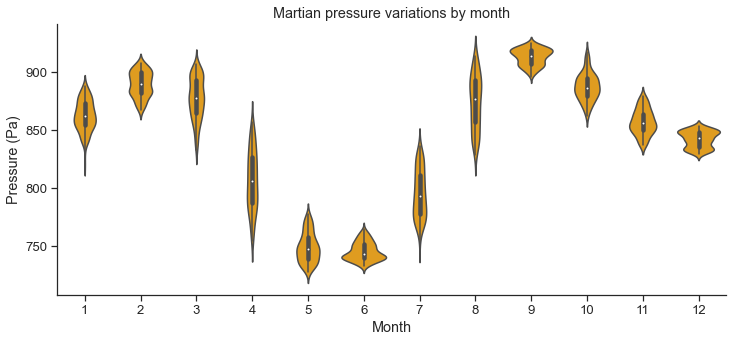

In [19]:
plt.figure(figsize=(12,5))
sns.violinplot(x='month',y='pressure',data=data_clean, color='orange')
plt.xlabel("Month")
plt.ylabel("Pressure (Pa)")
plt.title("Martian pressure variations by month")
sns.despine()

## Fig. 2
Now we can see how the pressure values are distributed by month. Unfortunately, what this tells us is that the pressure fulctuates between about 700 Pa and 950 Pa over the course of a year. Even at its maximum, it's well below the Armstrong limit, 6.3 kPa, the pressure at which water boils at the normal temperature of the human body (source: [WorldAtlas](https://www.worldatlas.com/articles/what-is-the-armstrong-limit-the-altitude-beyond-which-no-one-can-survive.html)). On the plus side, the critical point for water occurs at around 600 Pa (as seen in the phase diagram below). Since the pressure values are all greater than 600 Pa, that means there is potential for water to exist in liquid form, and it won't just undergo deposition when the temperature gets high enough.

![Water Phase Diagram](https://files.mtstatic.com/site_4334/63476/0?Expires=1638214837&Signature=T85Cn~ru-Z6-UwNgUeVpKMuAjrGrNDcRyUoJD4Z4jcCPBpiHP29LnxxETRETVZD7OTPk-MnLJqZ5fqo~Qofhfh6zrnIux3vwEZ~530vyKrn3lxcLVS1oBlKm3r~UW~MpQoLtlrMkJiaCLabBmUTRexzfqsRRZewE03CvOjAmKcU_&Key-Pair-Id=APKAJ5Y6AV4GI7A555NA)
Source: [Chemistry LibreTexts](https://chem.libretexts.org/Courses/Oregon_Institute_of_Technology/OIT%3A_CHE_202_-_General_Chemistry_II/Unit_8%3A_Solutions_and_Phase_Changes/8.1%3A_Heating_Curves_and_Phase_Changes/8.1%3A_Heating_Curves_and_Phase_Changes_(Problems))

---

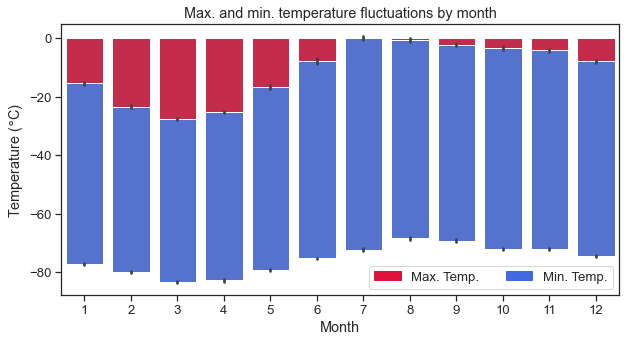

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x='month',y='min_temp',data=data_clean, color='royalblue')
sns.barplot(x='month',y='max_temp', data=data_clean, color='crimson')
plt.xlabel("Month")
plt.ylabel("Temperature ($\degree$C)")
plt.title("Max. and min. temperature fluctuations by month")

#Legend method from stack overflow (https://stackoverflow.com/questions/44098362/using-mpatches-patch-for-a-custom-legend)
import matplotlib.patches as mpatches

colors = ['crimson', 'royalblue']
texts = ['Max. Temp.','Min. Temp.']
patches = [mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts)) ]
plt.legend(handles=patches, ncol=2 )

### Fig. 3
Stacked bar plot of average max. and min. temperatures by month. The amount of blue on the plot shows us the actual average temp. fluctuation for each day. From the graph, it appears that the average magnitude of daily temp. fluctuation is about 60°C. The averages appear relatively consistent over the seasons.

For us humans, it's not so much the temperature *fluctuation* on Mars that's the problem, but the freezing cold minimum temperatures reached. The problem would really arise for other organisms that don't have thermal clothing to take on and off. With these extreme fluctuations, most organisms on Earth would not be able to regualte their body temperatures well enough to survive.

## Results and Conclusion
Here, I created three different visualizations to examine the relationships between the data and to investigate my research question: what weather characteristics make Mars uninhabitable? (And to what degree?)

From Fig. 1 and Fig. 2, we can see that the temperatures on Mars are rarely above zero, and the pressure is ridiculously low. That said, the conditions would allow for the presence of liquid water at times (during the warmer months). The heartiest of extremophiles, who could possibly survive extreme cold, extreme temperature fluctuation, and extremely low pressure... well, they *might* just be able to make it on Mars with a little bit of help. For the rest of us though, we have a long ways to go before Mars can become the next big tourist destination.